<a href="https://colab.research.google.com/github/faizer1989/AI_recipes/blob/main/Week_1_Computer%20Vision/01_CV_Coursebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💻Welcome to Week 1 of the DL101 Bootcamp 

You have successfully finished the warm-up! This is a great achievement as the first dive into AI, Machine, and Deep Learning can be overwhelming. This week we will focus on developing and building your own Computer Vision Model.

## 📕 Learning Objectives

* Go through the Machine Learning Workflow and see how it can be applied to a Computer Vision Model.
* See how to improve your model using Data Augmentation methods and the Data Cleaner.
* Build a Notebook App

## 📅 Weekly Progress

|Week | Content | Learning Objectives|
|:--- |:--- | :--- |
|0 | Warm Up & Theory | Get to know more about your classmates, the mentors, and learn about the fundamental concepts of Machine Learning, how it works, its limitations, and potential.
|**1** |**Computer Vision** | **Dive into Computer Vision, and learn about how machines are able to derive insights and make predictions from visual data. Build your own computer vision application, by gathering your own images and train your own model.**
|2 |Tabular Data | Comprehend how AI & Machine Learning can be applied to Tabular Data such as sales, marketing, or customer data, and learn how to deduce actionable insights for the future, and build your own classification or regression application.
|3 |Recommender Systems | Learn more about Recommender Systems, and understand how TikTok, Youtube, and Netflix are able to recommend your next favorite piece of content. Choose a dataset to build your own model to predict and recommend.
|4 | Natural Language Processing (NLP) | Apply AI & Machine Learning to text, discover Language Models and go through the process of how an AI model is able to generate, summarize and classify text. Build your own NLP application to automatically generate movie reviews, or analyze sentiment.
|5 | Practical AI for you & Graduation | Jump into a 1:1 mentorship session with our AI experts to define an AI project that solves a pain point in your organization, personal project, or life in general. Research, gather feedback, write an article and pitch your project to the class. Successfully graduate from the Bootcamp and receive your AI certification.

For this coursebook we require the [unpackAI](https://github.com/unpackAI/unpackai) and [fastbook](https://github.com/fastai/fastbook) package/library.

In [1]:
#@title ## 🔗 Install & Import Required Code Packages
!pip install -Uqq unpackai
!pip install -Uqq fastbook
from unpackai.utils import clean_error_img
from fastbook import *
from fastai.vision.widgets import *

## <font color='red'>IMPORTANT</font> 

***After you ran the code above, restart the runtime in order to avoid the erros. You can press: `Ctrl + M + .` on your keyboard (Smash all three keys together. After that re-run the cell and enjoy the rest of the learning***. 




# Introduction to Computer Vision

## What is Computer Vision in Machine Learning?

Computer Vision, often abbreviated as CV, is a field of application in Machine Learning (ML) that seeks to develop techniques to help computers “see” and understand the content of digital images such as photographs and videos to derive meaningful information.

### Applications in Computer Vision

#### Image Classification

In Image Classification, the model attempts to distinguish between and classify an entire entire image or photograph. The model is trained on a dataset that provides the image and a label (a caption that says what the image visualizes). The labels are predefined and fit into a set of classes such as "cat" or "dog". After training the model can identify patterns and correctly classify the right class.

<img src="https://github.com/unpackAI/DL101/blob/main/images/cv_CVImageClassification.png?raw=1" alt="classification" width="500"/>

#### Object Detection

Object detection is the task of classifying and localising one or more objects within one image. This task is more complex than simple image classification.

<img src="https://github.com/unpackAI/DL101/blob/main/images/cv_ObjectDetection.webp?raw=1
" alt="objectdetection" width="500"/>

#### Style Transfer

Style transfer or neural style transfer is the task of learning style from one or more images and applying that style to a new image. This task can be thought of as a type of photo filter or transform that may not have an objective evaluation.

<img src="https://github.com/unpackAI/DL101/blob/main/images/StyleTransfer.webp?raw=1" alt="styletransfer" width="500"/>

#### Image colorization

Image colorization involves converting a grayscale image to a full color image. Similarly like *Style Transfer*, this task can be thought of as a type of photo filter or transform that may not have an objective evaluation.

<img src="https://github.com/unpackAI/DL101/blob/main/images/cv_Image%20Colorization.webp?raw=1" alt="imagecolorization" width="500"/>

#### Image Synthesis

Image synthesis is the task of generating targeted modifications of existing images such as changing the style of an object in a scene or adding an object or face to a scene. The generation of entirely new images is also possible.

<img src="https://github.com/unpackAI/DL101/blob/main/images/cv_Image%20Synthesis.webp?raw=1" alt="imagesynthesis" width="500"/>

##### Other applications

There are also other applications such as reconstructing, increasing the resolution of images, Image Describing or Text-to-Image. However, we will not further dive into these as we want to keep our focus on the content below.

### How are machines able to process and "see" images?

In all of the applications above, the model is expected to "see" and understand the content of digital images. But how does a machine visualize images?

As it turns out, a machine sees an image as pixels as its the smallest unit in an image. In the visualization below, you can see exactly how a machine "sees" a 3. Each pixel has a minimum of 0 and a maximum of 255. The higher the number the darker the pixel. The entire image contains 28 pixels across and 28 pixels down, for a total of 784 pixels. (This is much smaller than an image that you would get from a phone camera, which has millions of pixels, but is a convenient size for our initial learning and experiments. We will build up to bigger, full-color images soon.) 

<img src="https://github.com/unpackAI/DL101/blob/main/images/cv_3inpixels.png?raw=1" alt="3inpixels" width="500"/>

The example above is a black and white image. How could a machine "see" a multicolored image using pixels? When we take a digital image, it is stored as a combination of pixels. Each pixel contains a different number of channels. If it is a black-and-white image, it has only one pixel, whereas if it is a coloured image, it contains three channels: red, green and blue.

As shown in the visualization of a digital coloured image below, each channel of each pixel has a value between 0 and 255. Each of these values represented in binary before a computer can understand the image.

<img src="https://github.com/unpackAI/DL101/blob/main/images/cv_multicoloredimage.jpeg?raw=1" alt="multicoloredimage" width="300" height="300"/>

Once we understand how a machine is able to process images, how can we apply machine learning for it to be able to learn and classify an image to different classes such as a "dog" or "cat"?

Similar to how a kid is taught to identify a cat, a machine learning model can be taught how to identify a cat in an image by giving several example images that contain an apple. From these example images, the model is processing the images and its pixels and learns and understand the features of an apple, like its shape and colour. Now when a new image of an apple is presented to this computer with this model, it can use what it had learned about apples earlier and identify that this new image also contains apple.

The above is a classical example of Image Classification. Luckily, we will now build our own Image Classification model. For that, we will look at the Machine Learning Workflow that we have previously learned. 

### Image Classification Machine Learning Workflow

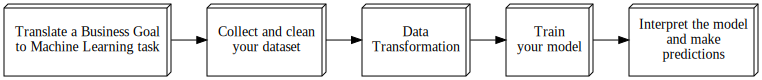

In [2]:
#@title
gv('''ordering=in
problem[shape=box3d width=1 height=1 label="Translate a Business Goal\n to Machine Learning task"]
dataset[shape=box3d width=1 height=1 label="Collect and clean \n your dataset"]
transform[shape=box3d width=1 height=1 label="Data\n Transformation"]
train[shape=box3d width=1 height=1 label="Train \n your model"]
predict[shape=box3d width=1 height=1 label="Interpret the model \n and make \n predictions"]
problem->dataset->transform->train->predict''')

1. *Translate a Business Goal to Machine Learning task:* Define your objective, dataset, the model you intend to build and the metrics you want to measure. It is important to do your research to see if labeled data already exists, where it comes from to define how you should define it for your model. What is your input and output?

2. *Collect and construct your dataset:* Collect all your images, remove faulty images, seperate them into classes and provide labels.

3. *Data Transformation:* Transform images and split them into different sets of data to prepare for model training.

4. *Train your model:* Train your model on images and the labels for it to learn patterns, colors or shapes in the images.

5. *Interpret the model and make predictions:* Measure the performance of the image classifier and test out its accuracy by making predictions on images that it has never seen before.

Lets go through the steps one by one!

# From the Problem to the Solution

## 1. Define a ML problem and propose a solution

In this chapter, we're going to use a computer vision example to look at the end-to-end process of creating a deep learning application. More specifically, we're going to build a bear image classifier!

**Objective & Key Metric:** The objective is to build a model that is able to differentiate between grizzly bears, black bears and teddy bears with a minimum accuracy of 90%.

**Dataset & Classes:** The dataset consists of a total of 450 images seperated in 3 different classes (meaning here "types of bear") that each have a set of 150 images. The three classes are: "black", "grizzly" and "teddy".

**Solution:** Our solution will be a 3-class, single-label classification model, which correctly classifies an image that it has never seen before in one of three classes named above.

In the process, we'll discuss the capabilities and constraints of deep learning, explore how to create datasets, look at possible gotchas when using deep learning in practice, and more. Many of the key points will apply equally well to other deep learning problems. If you work through a problem similar in key respects to our example problems, we expect you to get excellent results with little code, quickly.

## 2. Collect and construct your dataset



### Use a ready dataset

In order to properly run your first model without any hassle we have provided you with a ready dataset that can be used for the following exercises. The dataset consists of a total of 450 images seperated in 3 different classes that each have a set of 150 images. The three classes are: "black", "grizzly" and "teddy". The goal of the following exercises is to build an image classification model that is able to differentiate between these 3 classes, and correctly predict one of them when provided an image that it has never seen before.

A ready set of images is saved on a temporary GitHub repo. Run the code below to download it and get the path to the images.

Same like before, we will use `untar_data` to unpack and download the dataset.

In [3]:
#@title Download the Dataset
destination = Path("/content/bears")
destination.mkdir(exist_ok=True, parents=True)
for t in ['black', 'grizzly','teddy']:
    path2class = untar_data(f"https://github.com/vtecftwy/unpackai-image-set/blob/main/{t}.zip?raw=true", data=destination)
    assert path2class.is_dir(), f"Problem downloading {t}"

path = destination

We have now downloaded all the images into a folder that we specified and named it `path`. Lets check the destination folder of our images.

In [4]:
path

Path('/content/bears')

With the command below we can check that we now have 1 subfolder for each class (i.e. type of bear).

In [5]:
path.ls()

(#3) [Path('/content/bears/grizzly'),Path('/content/bears/teddy'),Path('/content/bears/black')]

Sometimes, especially in real life projects, erronous image are a frequetly occuring thing. We can fix the problem by checking each subfolder, and deleting all of the pictures that can not be open properly.

In [6]:
clean_error_img(path)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/148 [00:00<?, ?it/s]

We've successfully downloaded images of bears from three classes (around 150 each). 

Let's look at one:

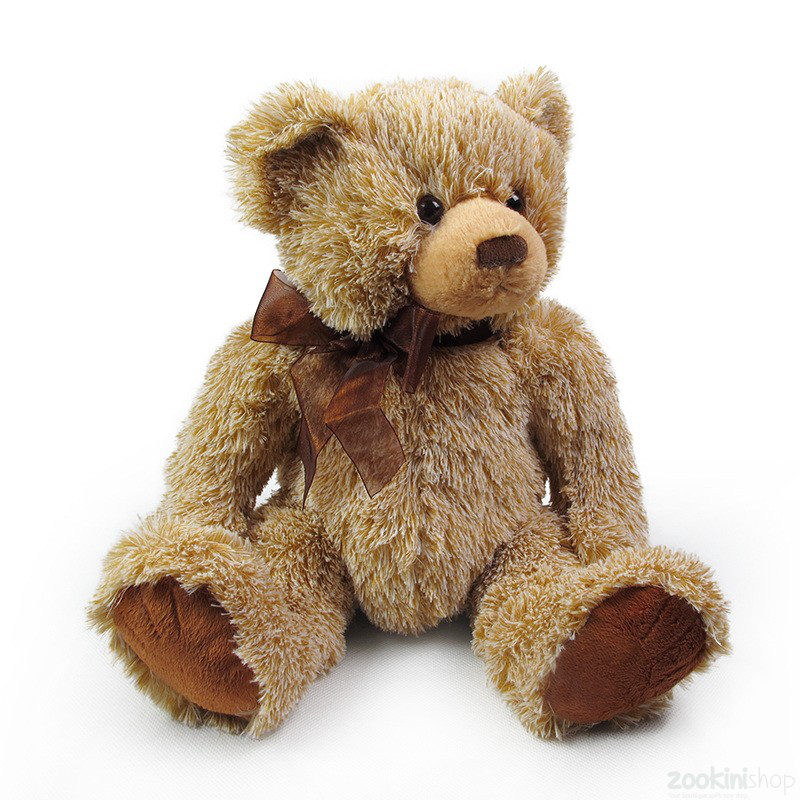

In [7]:
im = Image.open("/content/bears/teddy/00000001.jpg")
im

Now that we have downloaded some data, we need to transform and assemble it in a format suitable for model training.


For that, we will be using an object called `DataLoaders`.

## 3. Data Transformation: From Data to DataLoaders

The `DataLoaders` help us to transform the visual data in a way so that the model can process them. Moreover, it seperates our data in **two** chunks of data (i.e. images) that serve a different purpose. That is the training data and validation data. To understand the difference is a fundamental element of the following weeks.

The training data makes up the **training set** and the validation data makes up the **validation set**. Both are at the core of every supervised learning machine learning task.

> The *training set* is the set of data used to start training the model. The model uses the training data to optimise its parameters and minimize loss.

> The *validation set* is the sample of data used to evaluate the trained models performance on new data while continuing to improve and tune the model's parameters.

Note, that the data in the training or validation is randomly distributed, so there is no inherent difference in the training or validation data. The difference is in their purpose.

Aside from the **training set** and **validation set**, we should also mention the **test set**.

> The *test set* is the sample of data used to evaluate the final model without continuing to optimise its parameters.

Below, you can see the script to create `DataLoaders`. A lot of code, right? Do not worry. We will go one by one over every line of code and define its function. That is important because each line of code represents an important aspect in Machine Learning.

```python
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=Resize(128)
)
```

Let's look at each of these arguments in turn. In the `blocks` argument, we specify our dependent variable (variable that depends on changes of the independent variable) and independent variables (variables that are independent of other variables and have an impact on the dependant variable) and. We want to predict the dependant variable which in our case is the correct label of the image. The independant variables are images.

In order to specify that our inputs are images and our targets are categories we use ImageBlock (i.e. images = independent variable) and CategoryBlock (label = name of folder: teddy, grizzly and black).

```python
blocks=(ImageBlock, CategoryBlock)
```


For this `DataLoaders` our underlying items will be file paths. We have to tell fastai how to get a list of those files. The `get_image_files` function takes a path, and automatically returns a list of all of the images in that path:

```python
get_items=get_image_files
```


The `splitter` below will help us to split our data into the **training set** and **validation set** (Note: Remember the difference).

Using `valid_pct=0.2` we split our dataset in a way that 80% of our data will be part of the training set and 20% of our data part of the validation set. The 20% that is part of the validation set is selected randomly.


```python
splitter = RandomSplitter(valid_pct=0.2)
```

The independent variable is often referred to as `x` and the dependent variable is often referred to as `y`. Here, we are telling fastai what function to call to create the labels in our dataset. `parent_label` is a function provided by fastai that simply gets the name of the folder a file is in. Because we put each of our bear images into folders based on the type of bear, this is going to give us the labels that we need.

```python
get_y=parent_label
```

Our images are all different sizes, and this is a problem for deep learning: we don't feed the model one image at a time but several of them (what we call a *mini-batch*). So, we need to add a transform which will resize these images to the same size. *Item transforms* are pieces of code that run on each individual item, whether it be an image, class/category, or so forth. We use the `Resize` transform here. The higher the number in the bracket the bigger the size of the image.

```python
item_tfms=Resize(128)
```

Now that we have defined each line in our `DataLoaders`, lets run the code.

In [8]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=Resize(128)
)


Now that we have created the `DataLoaders`, we can apply thme to our downloaded data. In order to do that, we simply define the actual source of our data. In this case, the `path` where the images can be found. Out of convenience, lets call the data filled `DataLoaders` `dls` (short for `DataLoaders`).

In [9]:
dls = bears.dataloaders(path)

Lets have a look at our images by calling the `show_batch` method on our `DataLoaders`. Feel free to change the amount of `man_n` (amount of images to be shown) and `nrows` (amount of rows).

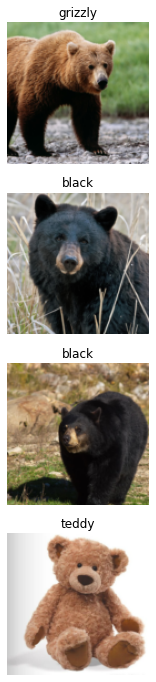

In [10]:
dls.valid.show_batch(max_n=4, nrows=4)

As you can see above, the `Resize(128)` command that we have used above *crops* the images to fit a square shape of the size requested, using the full width or height. This can result in losing some important details such as accidently cropping away the head of a bear.

As an alternative, you can squish/stretch them. We do that by slightly modifying the `item_tfms` in the exact same `DataLoaders` we defined above. We then again pass in our data (the `path`) into our preprepared `DataLoaders` (i.e. `dls`) and `dls.valid.show_batch` in order to a batch of our validation data.

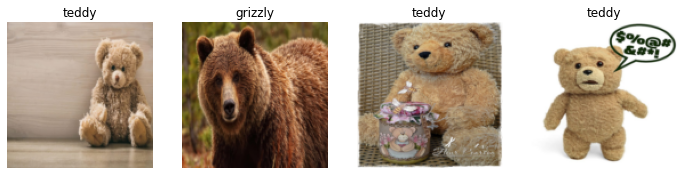

In [11]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=Resize(128, ResizeMethod.Squish)
)
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

Or pad the images with zeros (black):

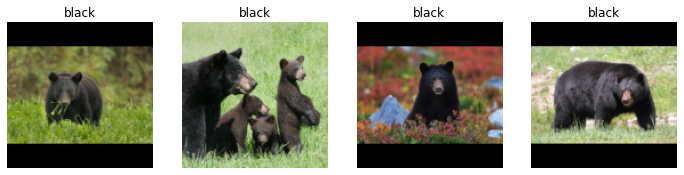

In [12]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')
)
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

### Data Augmentation

Considering that the visual data that we are using to train our model is super super important, all of these approaches seem somewhat wasteful, or problematic. If we squish or stretch the images they end up as unrealistic shapes, leading to a model that learns that things look different to how they actually are, which we would expect to result in lower accuracy. If we crop the images then we remove some of the features that allow us to perform recognition. For instance, if we were trying to recognize breeds of dog or cat, we might end up cropping out a key part of the body or the face necessary to distinguish between similar breeds. If we pad the images with zeros (black) then we have a whole lot of empty space, which is just wasted computation for our model and results in a lower effective resolution for the part of the image we actually use.

Instead, what we normally do in practice is to randomly select part of the image, and crop to just that part. On each epoch (which is one complete pass through all of our images in the dataset) we randomly select a different part of each image. This means that our model can learn to focus on, and recognize, different features in our images. It also reflects how images work in the real world: different photos of the same thing may be framed in slightly different ways.

In fact, an entirely untrained neural network knows nothing whatsoever about how images behave. It doesn't even recognize that when an object is rotated by one degree, it still is a picture of the same thing! So actually training the neural network with examples of images where the objects are in slightly different places and slightly different sizes helps it to understand the basic concept of what an object is, and how it can be represented in an image. It makes the model robust to recognise the actual content of the image even if its "deformed".

Here's another example where we replace `Resize` with `RandomResizedCrop`, which is the transform that provides the behavior we just described (randomly select a part of the image to be cropped on each epoch). The most important parameter to pass in is `min_scale`, which determines how much of the image to select at minimum each time. Feel free to change the parameters of the code below.

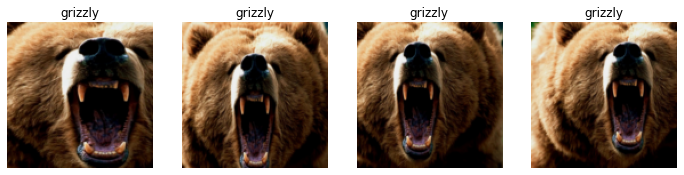

In [13]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(128, min_scale=0.3)
)
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

We used `unique=True` to have the same image repeated with different versions of this `RandomResizedCrop` transform to clarify this technique for you.

**`RandomResizedCrop` is a specific example of a more general technique, called data augmentation.**

*Data augmentation* refers to creating random variations of our **training data**, such that they appear different, but do not actually change the meaning of the data. Data Augmentation is only performed on the training data as it helps the model become more generalize and robust. Note that we used `dls.train.show_batch` instead of `dls.valid.show_batch`, as we are now intending to show the operations we have applied to our training data.

Examples of other common data augmentation techniques for images are rotation, flipping, perspective warping, brightness changes, and contrast changes. For natural photo images such as the ones we are using here, we can use a standard set of data augmentations that are provided with the `aug_transforms` function. 

Because our images are now all the same size (due to `Resize(128)`), we can apply these data augmentations to an entire batch of data using the GPU, which will save a lot of time. To define that we want to use these transforms on a data batch, we use the `batch_tfms` parameter. In order to emphasize the effect of the effect of data augmentation, we're not using `RandomResizedCrop`; we're also using double the amount of augmentation (using `mult=2`) compared to the default, for the same reason:

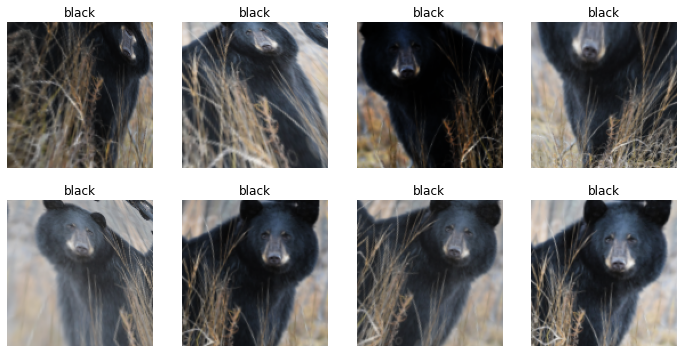

In [14]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2)
)
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

Now that we have assembled our data in a format fit for model training, let's actually train an image classifier using it.

## 4. Training Your Model, and Using It to Clean Your Data

We don't have a lot of data for our problem (150 pictures of each sort of bear at most), so to train our model, we'll use `RandomResizedCrop` with an image size of 224 px, which is fairly standard for image classification, and default `aug_transforms`:

In [17]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(250, min_scale=0.5),
    batch_tfms=aug_transforms()
)
dls = bears.dataloaders(path)

We can now finally train our model and create our `Learner` to fine-tune it in the usual way. Note that we are utilizing a pre-trained neural network called `resnet18`.

In [19]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(3)

After the training is done, you will be able to view different metrics per epoch. All are briefly described below.


> `train_loss`: Training loss is the error on the **training set** of data. This represents how well the model performs exclusively on the training data.

> `valid_loss`: Validation loss is the error after running the **validation set** of data through the trained network. This represents how well the model performs exclusively on the validation data AFTER being trained on the training data.

> `error_rate / accuracy`: Accuracy is the percent of correctly predicted data points out of the validation data points. The error rate is 1 - accuracy. Note, that we will *always* show you your model's accuracy/error rate using *only* the validation set, *never* the training set. This is absolutely critical, because if you train a large enough model for a long enough time, it will eventually memorize the label and patterns of every item in your dataset! The result will not actually be a useful model, because the model simply memorized only the images that it has been trained on. But what we acually care about is how well our model works on *previously unseen images*. That is always our goal when creating a model: for it to be useful on data that the model only sees in the future, after it has been trained.
Even when your model has not fully memorized all your data, earlier on in training it may have memorized certain parts of it. As a result, the longer you train for, the better your accuracy will get on the training set; the validation set accuracy will also improve for a while, but eventually it will start getting worse as the model starts to memorize the training set, rather than finding generalizable underlying patterns in the data. When this happens, we say that the model is *overfitting*.

The above leaves us with a few very important conclusions. Try to go through them and explain it to yourself. If you feel unclear, make sure to bring it up with the group. We will also discuss the concept of overfitting and underfitting.

Conclusions: 

1.   If the `train_loss` is decreasing while the `valid_loss` is increasing this means that your model is overfitting.
2.   If the `train_loss`, `valid_loss` and `error_rate` are very high and are further decreasing that means your model is underfitting (= unable to capture the relationship between the input and output variables accurately).
3. As long as `valid_loss` is decreasing (even if your `error_rate` is stagnating), your models performance is getting better and better. That is why you need to train more and more epochs until your `valid_loss` is not further decreasing.



Now let's interpret our results and put them into context. To visualize where our model was confused and made errors (if at all), we can create a *confusion matrix*:

The rows represent all the black, grizzly, and teddy bears in our dataset, respectively. The columns represent the images which the model predicted as black, grizzly, and teddy bears, respectively. Therefore, the diagonal of the matrix shows the images which were classified correctly, and the off-diagonal blocks represent those which were classified incorrectly. This is one of the many ways that allows you to view the results of your model. It is (of course!) calculated using the validation set. With the color-coding, the goal is to have white everywhere except the diagonal, where we want dark blue. Our bear classifier isn't making many mistakes!

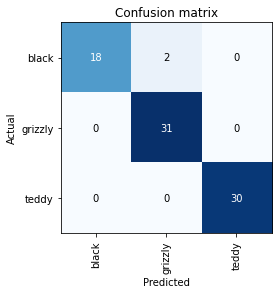

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In the case, that you encountered any incorrect predictions, it's also helpful to see where exactly our errors are occurring. This could provide us insights to see if its a problem with the data itself (e.g., images that aren't bears at all, or are labeled incorrectly, etc.) or indeed with the model (perhaps it isn't handling images taken with unusual lighting, or from a different angle, etc.). To do this, we rank rank the images with the highest loss. Remember that we are calculating the loss for every images in order to improve our models parameters/weights.

The loss is a number that is higher if the model is incorrect (especially if it's also confident of its incorrect answer), or if it's correct, but not confident of its correct answer. 

For now, `plot_top_losses` shows us the images with the highest loss in our dataset. As the title of the output says, each image is labeled with four things: prediction (predicted class of model), actual (target label), loss, and probability. The *probability* here is the confidence level, from zero to one, that the model has assigned to its prediction.

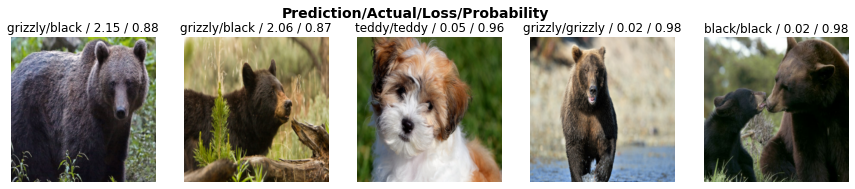

In [25]:
interp.plot_top_losses(5, nrows=1)

You might encounter cases like we described above, in which the label might be wrong or the image is simply out of the scope of any classes.

The intuitive approach to doing data cleaning is to do it *before* you train a model. But as you've seen in this case, a model can actually help you find data issues more quickly and easily. So, we normally prefer to train a quick and simple model first, and then use it to help us with data cleaning.

Below you can see a handy GUI (graphical user interface) for data cleaning called `ImageClassifierCleaner` that allows you to choose a class/category and the training versus validation set and view the highest-loss images (in order), along with menus to allow images to be selected for removal or relabeling:

In [26]:
cleaner = ImageClassifierCleaner(learn)
cleaner

You can choose to simply `<Keep>` (default) or `<Delete>` the image, or change the class of the image in case the label is wrong.

The `ImageClassifierCleaner` doesn't actually do the deleting or changing of labels for you; it just returns the indices of items to change. So, for instance, to delete all images selected for deletion, or move images for which we've selected a different class/category, we would run the script below.

> Cleaning the data and getting it ready for your model are two of the biggest challenges for data scientists; they say it takes 90% of their time.

In [27]:
#@title Delete or change classes of images as indicated in the `ImageClassifierCleaner`
for idx in cleaner.delete(): cleaner.fns[idx].unlink() #Delete
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat) #Change Class

Once we've cleaned up our data, we can retrain our model. Try it yourself, and see if your accuracy improves!

> NOTE: If you have changed the dataset by either deleting or changing the classes of the images you will have to rebuild your dataloaders like we have done so above. After that you can retrain the model and compare the accuracy.

In [28]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)
dls = bears.dataloaders(path)

In [29]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(4)

> note: No Need for Big Data: After cleaning the dataset using these steps, we generally are seeing a very high accuracy on this task. To achieve this, it didn't require a huge dataset of us. As you can see, the common complaint that you need massive amounts of data to do deep learning is simply not true.

## 5. Make predictions

Now that we have trained our model, lets test it on external data. For that we will simply use our upload widget again.

> In order to do that within our Coursebook we will utilize IPython widgets (ipywidgets). *IPython widgets* are GUI (graphical user interface) components that bring together JavaScript and Python functionality in a web browser, and can be created and used within a Jupyter notebook. For instance, the image cleaner that we saw earlier in this chapter is entirely written with IPython widgets.

In [30]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

Then we again have a look at our image.

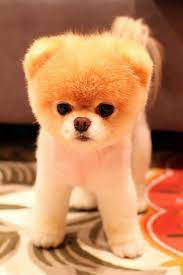

In [32]:
img = PILImage.create(uploader.data[0])
img

And finally predict.

In [33]:
pred, pred_idx, probs = learn.predict(img)
print(f"This is a {pred}")
print(f"Probability: {probs[pred_idx]:.04f}")

This is a teddy
Probability: 1.0000


Great success!

## Bonus Step: Create a Notebook App from the Model

Having successfully build and run our model, we can build our notebook internal app. For that we need to build the functionality of an `uploader` button and a `classify` button that triggers `output` to show the uploaded image and the `prediction` to provide the predicted label and probability.

Lets build just that!

In [34]:
#@title Build the functionality of our Notebook App
uploader = widgets.FileUpload()
output = widgets.Output()
classify = widgets.Button(description='Classify')
prediction = widgets.Label()

def on_click_classify(change):
    img = PILImage.create(uploader.data[-1])
    output.clear_output()
    with output: 
      display(img.to_thumb(254,254))
    pred, pred_idx, probs = learn.predict(img)
    prediction.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

classify.on_click(on_click_classify)

VBox([widgets.Label('Select your image!'), 
      uploader, classify, output, prediction])

Great job! You have successfully build your first image classifier notebook app.

## Your Deliverables, your time to apply the theory in practice.

Congratulations on getting to the end of this Notebook and no worries at all if you struggled with some of the theory and did not fully understand what was taught here as your actual learning starts from here.

The ideal time of reading this, is right before the Review Session, so you have a bit of time to reflect about the learning material, identify the most confusing and hard elements of a reading, and bring them to the discussion during the Review Session. The Review session is there for you to close the gap in your current understanding of the material.

For your deliverables you will have to work on the Workbook.